# Rambo Steve Status Report Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
# Had an intial extra index column
data = pd.read_csv('src/results_a0.3_g0.9_eps0.6_n5_graph.csv').drop('Unnamed: 0', axis=1)
data_100 = data[data['episode'] < 101]

In [3]:
data.head()

,episode,mob_type,total_damage_dealt,total_health_lost,total_time,min_reward,max_reward,killed_mob
0,1,Skeleton,20.0,3.333332,6.545924,-20.0,104.999985,True
1,2,Witch,2.0,8.666666,11.964705,-60.0,60.000000,False
2,3,Skeleton,20.0,16.333331,8.122525,-20.0,45.000000,True
3,4,Skeleton,20.0,0.000000,9.943326,-20.0,60.000015,True
4,5,Witch,0.0,20.000000,10.781043,-45.0,60.000000,False


In [4]:
data.describe()

,episode,total_damage_dealt,total_health_lost,total_time,min_reward,max_reward
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,13.630262,8.546000,9.380840,-31.999757,74.857928
std,288.819436,8.822125,6.967930,2.440124,18.073376,26.480745
min,1.000000,0.000000,-1.000000,2.565560,-70.000000,30.000000
25%,250.750000,2.000000,2.125000,7.457932,-60.000000,59.040002
50%,500.500000,20.000000,6.833334,9.701411,-20.000000,70.000000
75%,750.250000,20.000000,14.708334,11.967923,-20.000000,90.000000
max,1000.000000,26.000000,20.000000,12.093492,-20.000000,180.000000


In [5]:
data['mob_type'].unique()

array(['Skeleton', 'Witch', 'Zombie'], dtype=object)

# Overall Plots

Only the first 100 episodes were plotted due to the fact that an X axis of 1000 episodes would look too convoluted.

In [6]:
PLOT_PATH = 'graphs/'

def plot_health_and_damage(data, title, save_fig=False):
    plt.figure(figsize=(12, 8))
    X = np.arange(len(data['episode']))

    sns.lineplot(x=X, y=data['total_damage_dealt'], label='Total Damage Dealt')
    sns.lineplot(x=X, y=data['total_health_lost'], label='Total Health Lost')
    plt.title('{}: Total Damage and Health Over 100 Episodes'.format(title), fontsize=18)
    plt.xlabel('Episodes', fontsize=14)
    plt.ylabel('Health lost and Damage Dealt', fontsize=14)
    plt.legend(loc='upper right');
    
    if save_fig:
        plt.savefig('{}{}_health_damage.png'.format(PLOT_PATH, title))
    
def plot_rewards(data, title, save_fig=False):
    plt.figure(figsize=(12, 8))
    X = np.arange(len(data))

    sns.lineplot(x=data['episode'], y=data['max_reward'], label='Reward')
    plt.title('{}: Reward vs. Episode'.format(title), fontsize=18)
    plt.xlabel('Episodes', fontsize=14)
    plt.ylabel('Reward Score', fontsize=14)
    plt.legend(loc='upper right');
    
    if save_fig:
        plt.savefig('{}{}_rewards.png'.format(PLOT_PATH, title))
    
def plot_killed_mob(data, title, save_fig=False):
    plt.figure(figsize=(8, 6))

    sns.countplot(data['killed_mob'], palette='Set1', alpha=0.8)
    plt.title('Agent Success in {} Killing'.format(title), fontsize=18)
    plt.xlabel('Killed Mobs', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    if save_fig:
        plt.savefig('{}{}_killed_mob.png'.format(PLOT_PATH, title))

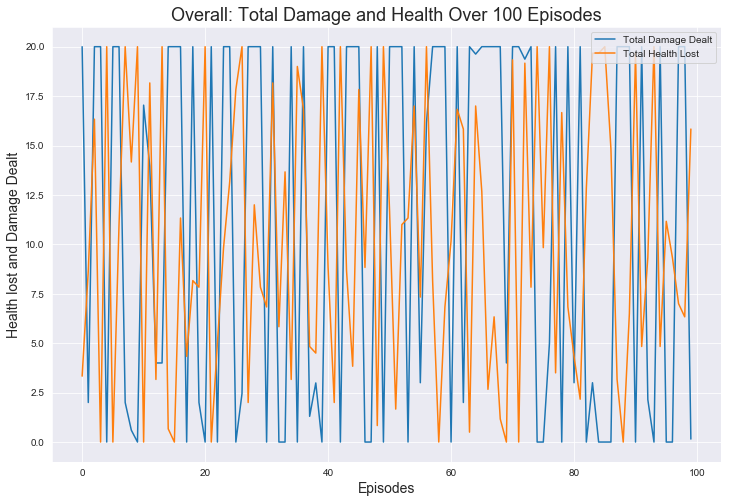

In [7]:
plot_health_and_damage(data_100, 'Overall', save_fig=True)

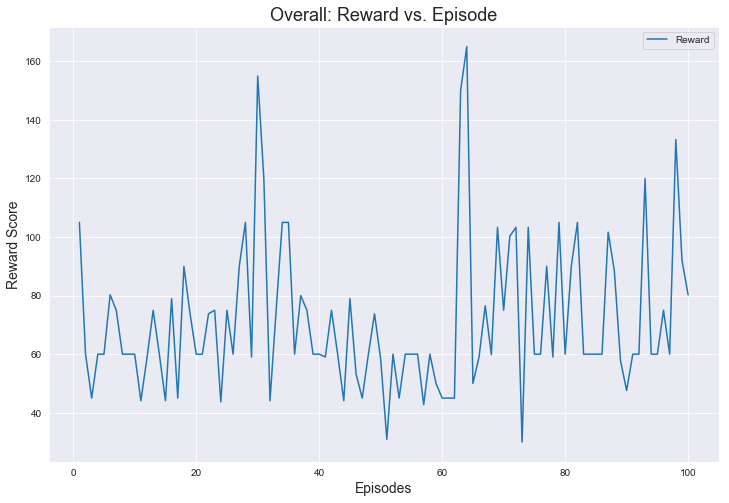

In [8]:
plot_rewards(data_100, 'Overall', save_fig=True)

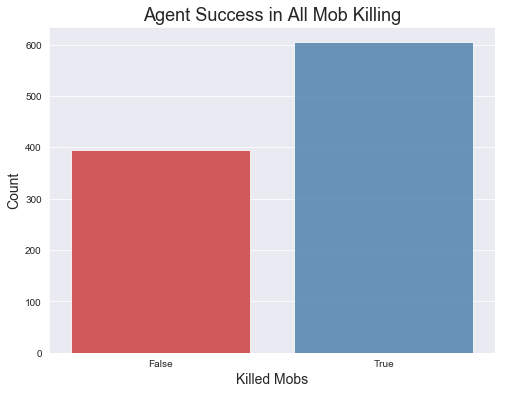

In [9]:
plot_killed_mob(data, 'All Mob', save_fig=True)

In [10]:
skeleton = data[data['mob_type'] == 'Skeleton']
witch = data[data['mob_type'] == 'Witch']
zombie = data[data['mob_type'] == 'Zombie']

# Zombie

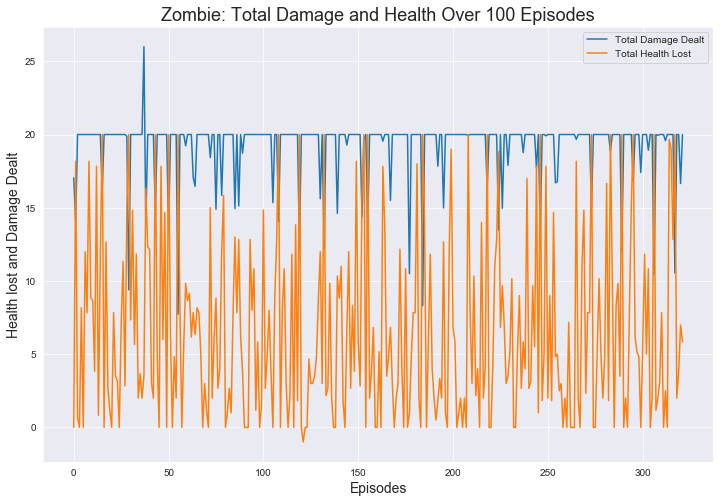

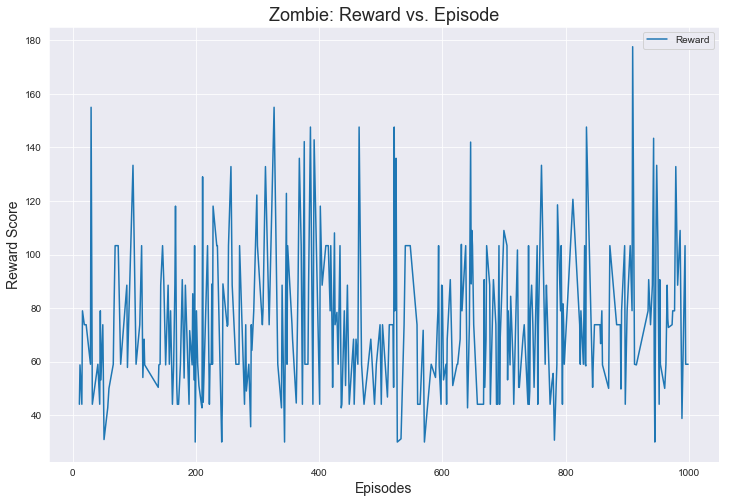

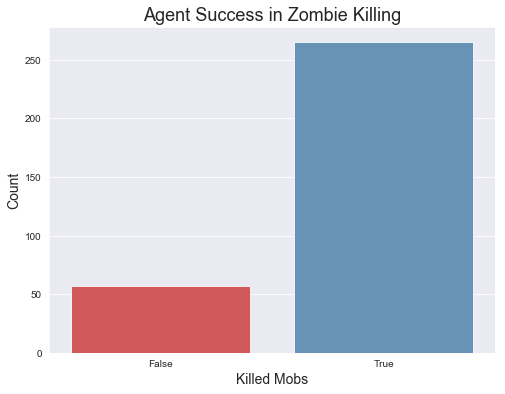

In [11]:
plot_health_and_damage(zombie, 'Zombie', save_fig=True)
plot_rewards(zombie, 'Zombie', save_fig=True)
plot_killed_mob(zombie, 'Zombie', save_fig=True)

# Skeleton

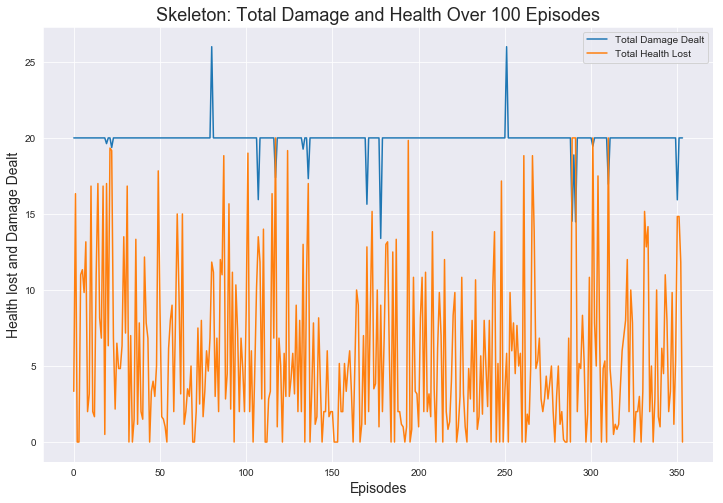

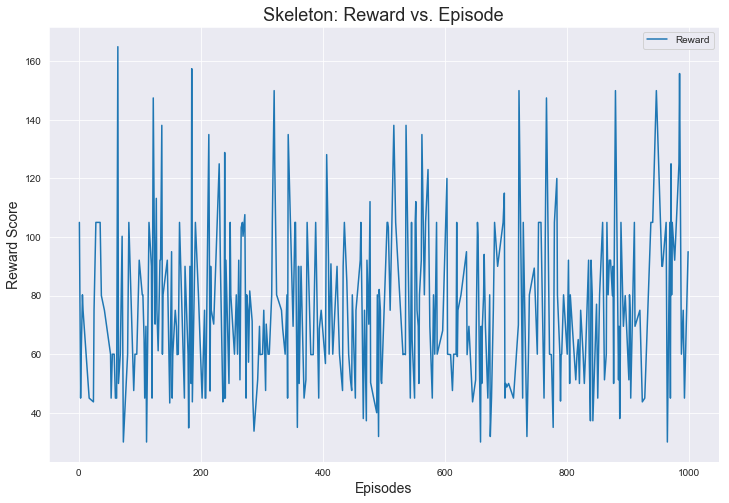

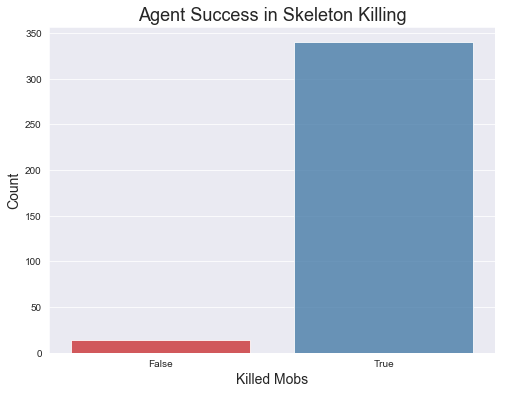

In [12]:
plot_health_and_damage(skeleton, 'Skeleton', save_fig=True)
plot_rewards(skeleton, 'Skeleton', save_fig=True)
plot_killed_mob(skeleton, 'Skeleton', save_fig=True)

# Witch

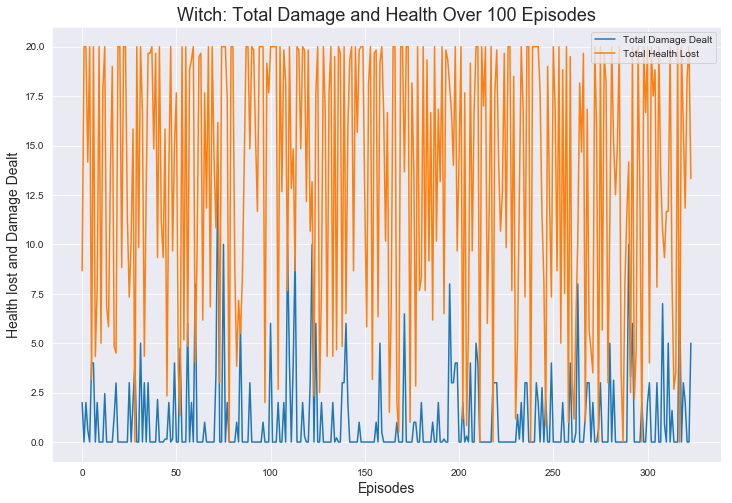

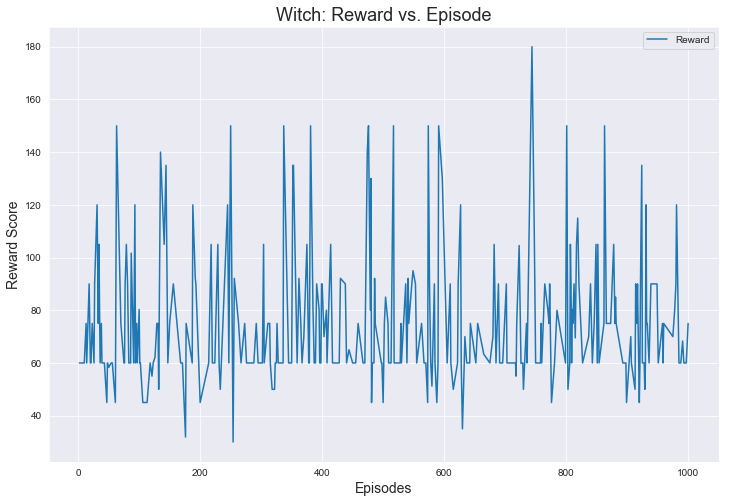

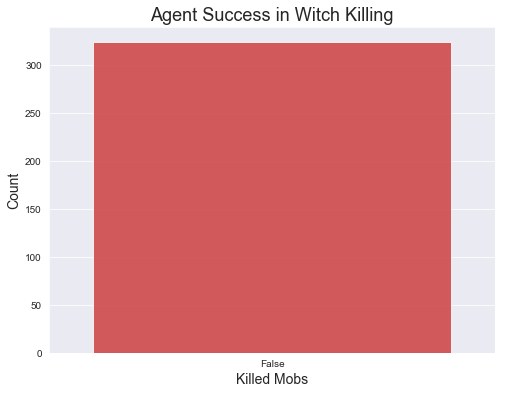

In [13]:
plot_health_and_damage(witch, 'Witch', save_fig=True)
plot_rewards(witch, 'Witch', save_fig=True)
plot_killed_mob(witch, 'Witch', save_fig=True)